In [389]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

pd.__version__

data = pd.read_excel(open('data/data.xlsx', 'rb'),
              sheet_name='Sheet1')

data.head()

,N,S,I,a,b,delta_t,R0
0,60000000,60000000,600,0.000025,600,0.001,2.5



# - - - # [ Test Data ] # - - - #

>>> N: Entire population: 60000000 
(N) has fixed size 

>>> S: Susceptible people: 59999400 
(S) indicates people that aren't infected by the virus, yet 

>>> I: Infectious people: 600 
(I) indicates people who are affected by the virus 

>>> R: Removed people: 0 
(R) indicates people who either died or got over the virus 

>>> R0: Reproduction Rate: 2.5 
(R0) indicates the number of people that can be contaged by a single infected person 

>>> a: Coefficient of proportionality (1): 2.5e-05 
(a) is determined by:
	- contagiousness of the virus
	- n of contacts of infected people

>>> b: Coefficient of proportionality (2): 600 
(b) is determined by:
	- efficiency of healthcare 




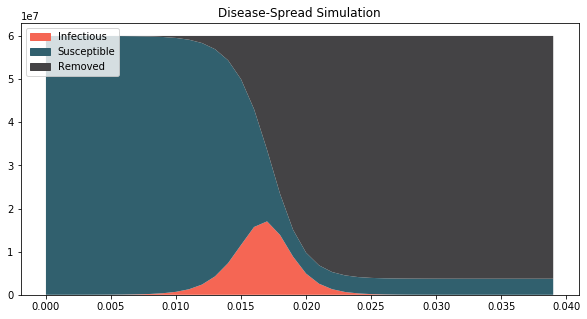

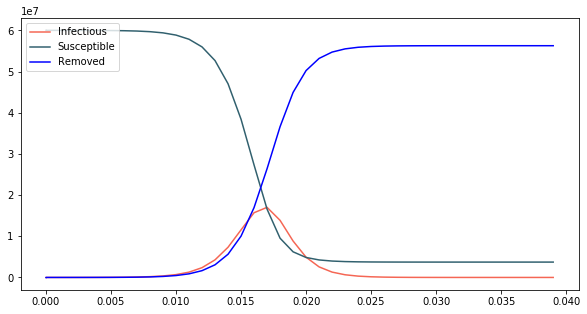

In [390]:
# test case 1: using sample input data

# input data from dataframe using pandas
N = data['N'][0]
I = data['I'][0]
S = data['S'][0] - I
const_a = data['a'][0]
const_b = data['b'][0]
delta_t = data['delta_t'][0]
R0 = data['R0'][0]

# data description
print('\n# - - - # [ Test Data ] # - - - #')
print('\n>>> N: Entire population:', N,
      '\n(N) has fixed size',
      '\n\n>>> S: Susceptible people:', S,
      '\n(S) indicates people that aren\'t infected by the virus, yet',
      '\n\n>>> I: Infectious people:', I,
      '\n(I) indicates people who are affected by the virus',
      '\n\n>>> R: Removed people:', 0,
      '\n(R) indicates people who either died or got over the virus',
      '\n\n>>> R0: Reproduction Rate:', R0,
      '\n(R0) indicates the number of people that can be contaged by a single infected person',
      '\n\n>>> a: Coefficient of proportionality (1):', const_a, 
      '\n(a) is determined by:\n\t- contagiousness of the virus\n\t- n of contacts of infected people'
      '\n\n>>> b: Coefficient of proportionality (2):', const_b, 
      '\n(b) is determined by:\n\t- efficiency of healthcare', '\n\n')

# additional data initializazion
graph_tot_time = 40 # max x displayed value
graph_x = [0] # x axis data: time (array of delta_t(s))
graph_S = [S] # y axis data (0): num of Susceptible people at time graph_x[i]
graph_I = [I] # y axis data (1): "" of Infected people ""
graph_R = [0] # y axis data (2): "" of Removed people ""

# graph calcs
for i in range(graph_tot_time):
    graph_S.append(graph_S[i] - (const_a * graph_S[i] * graph_I[i] * delta_t)) 
    # S(k+1) = Sk − (a*Sk*Ik*∆t)   

    graph_I.append(graph_I[i] + (const_a * graph_S[i] * graph_I[i] * delta_t) - (const_b * graph_I[i] * delta_t)) 
    # I(k+1) = Ik + (a*Sk*Ik*∆t) − (b*Ik*∆t)    
    
    graph_R.append(graph_R[i] + (const_b * graph_I[i] * delta_t)) 
    # R(k+1) = Rk + (b*Ik*∆t) 
    
    graph_x.append(delta_t * i)

# show graph #1
fig = plt.figure(facecolor='w', figsize=(10,5))
plt.title('Disease-Spread Simulation')
plt.stackplot(graph_x, graph_I, graph_S, graph_R, colors=['#f56654', '#31606e', '#444345'])
red_patch = mpatches.Patch(color='#f56654', label='Infectious')
blue_patch = mpatches.Patch(color='#31606e', label='Susceptible')
gray_patch = mpatches.Patch(color='#444345', label='Removed')
plt.legend(handles=[red_patch, blue_patch, gray_patch], loc='upper left')
plt.show()

# show graph #2
fig = plt.figure(facecolor='w', figsize=(10,5))
plt.plot(graph_x, graph_I, label='Infectious', c='#f56654')
plt.plot(graph_x, graph_S, label='Susceptible', c='#31606e')
plt.plot(graph_x, graph_R, label='Removed', c='blue')
plt.legend(loc='upper left')
plt.show()

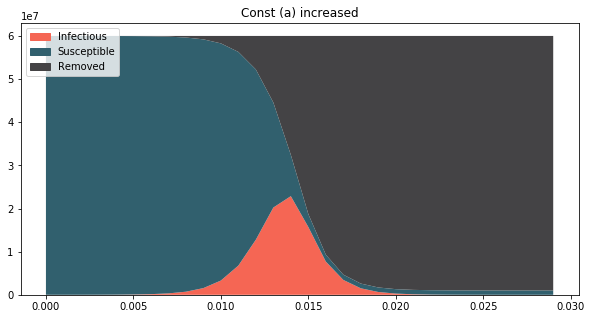


>>> Const (a) increased (from 0.000025 to 0.000030)
 	:: virus more contagious
 	:: more contacts between infected people



In [391]:
# test case 2: variating constant (a)

# input data from dataframe using pandas
N = data['N'][0]
S = data['S'][0]
I = data['I'][0]
const_a = 0.000030 # const_b increased: from 0.000025 to 0.000030
const_b = data['b'][0]
delta_t = data['delta_t'][0]
R0 = data['R0'][0]

# additional data initializazion
graph_tot_time = 30 # max x displayed value
graph_x = [0] # x axis data: time (array of delta_t(s))
graph_S = [S] # y axis data (0): num of Susceptible people at time graph_x[i]
graph_I = [I] # y axis data (1): "" of Infected people ""
graph_R = [0] # y axis data (2): "" of Removed people ""

# graph calcs
for i in range(graph_tot_time):
    graph_S.append(graph_S[i] - (const_a * graph_S[i] * graph_I[i] * delta_t)) #f(x): S(k+1) = Sk − (a*Sk*Ik*∆t)   
    # S(k+1) = Sk − (a*Sk*Ik*∆t)   
    
    graph_I.append(graph_I[i] + (const_a * graph_S[i] * graph_I[i] * delta_t) - (const_b * graph_I[i] * delta_t)) #f(x): I(k+1) = Ik + (a*Sk*Ik*∆t) − (b*Ik*∆t)    
    # I(k+1) = Ik + (a*Sk*Ik*∆t) − (b*Ik*∆t)  
    
    graph_R.append(graph_R[i] + (const_b * graph_I[i] * delta_t)) #f(x): R(k+1) = Rk + (b*Ik*∆t)          
    # R(k+1) = Rk + (b*Ik*∆t)
    
    graph_x.append(delta_t * i)

# show graph
print('\n\n')
fig = plt.figure(facecolor='w', figsize=(10,5))
plt.title('Const (a) increased')
plt.stackplot(graph_x, graph_I, graph_S, graph_R, colors=['#f56654', '#31606e', '#444345'])
red_patch = mpatches.Patch(color='#f56654', label='Infectious')
blue_patch = mpatches.Patch(color='#31606e', label='Susceptible')
gray_patch = mpatches.Patch(color='#444345', label='Removed')
plt.legend(handles=[red_patch, blue_patch, gray_patch], loc='upper left')
plt.show()

# description
print('\n>>> Const (a) increased (from 0.000025 to 0.000030)\n',
      '\t:: virus more contagious\n',
      '\t:: more contacts between infected people\n')

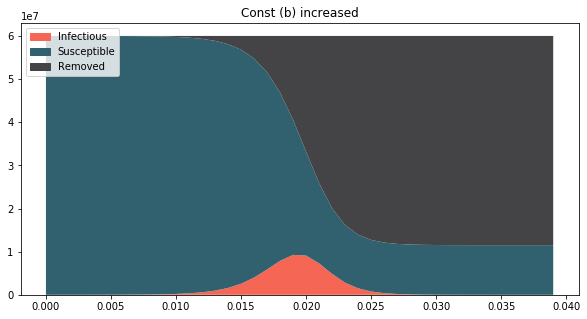


>>> Const (b) increased (from 600 to 800)
	:: more healthcare efficiency



In [383]:
# test case 3: variating constant (b)

# input data from dataframe using pandas
N = data['N'][0]
S = data['S'][0]
I = data['I'][0]
const_a = data['a'][0]
const_b = 800 # const_b increased: from 600 to 800
delta_t = data['delta_t'][0]
R0 = data['R0'][0]

# additional data initializazion
graph_tot_time = 40 # max x displayed value
graph_x = [0] # x axis data: time (array of delta_t(s))
graph_S = [S] # y axis data (0): num of Susceptible people at time graph_x[i]
graph_I = [I] # y axis data (1): "" of Infected people ""
graph_R = [0] # y axis data (2): "" of Removed people ""

# graph calcs
for i in range(graph_tot_time):
    graph_S.append(graph_S[i] - (const_a * graph_S[i] * graph_I[i] * delta_t)) #f(x): S(k+1) = Sk − (a*Sk*Ik*∆t)   
    # S(k+1) = Sk − (a*Sk*Ik*∆t)
    
    graph_I.append(graph_I[i] + (const_a * graph_S[i] * graph_I[i] * delta_t) - (const_b * graph_I[i] * delta_t)) #f(x): I(k+1) = Ik + (a*Sk*Ik*∆t) − (b*Ik*∆t)    
    # I(k+1) = Ik + (a*Sk*Ik*∆t) − (b*Ik*∆t)
    
    graph_R.append(graph_R[i] + (const_b * graph_I[i] * delta_t)) #f(x): R(k+1) = Rk + (b*Ik*∆t)          
    # R(k+1) = Rk + (b*Ik*∆t)
    
    graph_x.append(delta_t * i)

# show graph
print('\n\n')
fig = plt.figure(facecolor='w', figsize=(10,5))
plt.title('Const (b) increased')
plt.stackplot(graph_x, graph_I, graph_S, graph_R, colors=['#f56654', '#31606e', '#444345'])
red_patch = mpatches.Patch(color='#f56654', label='Infectious')
blue_patch = mpatches.Patch(color='#31606e', label='Susceptible')
gray_patch = mpatches.Patch(color='#444345', label='Removed')
plt.legend(handles=[red_patch, blue_patch, gray_patch], loc='upper left')
plt.show()

# description
print('\n>>> Const (b) increased (from 600 to 800)'
     '\n\t:: more healthcare efficiency\n') 


# - - - # [ Reproduction Rate Value ] # - - - # 

(?) How is it calculated? 

> f(x): R0 = (a*N)/b

>>> Examples:
What happens at different Reproduction Rate (R) values?
 


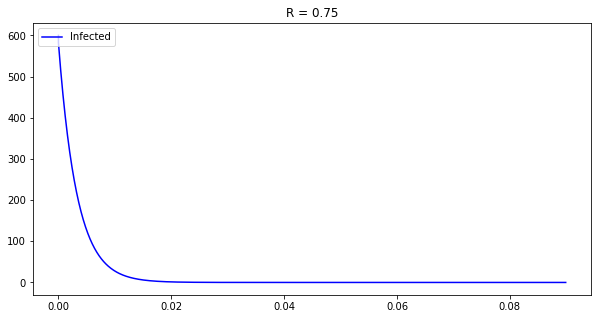


(i) In this first case the Reproduction Value (R) is < 0.
  > The total number of infectious people quickly comes down to zero, so an epidemic doesn't take place.




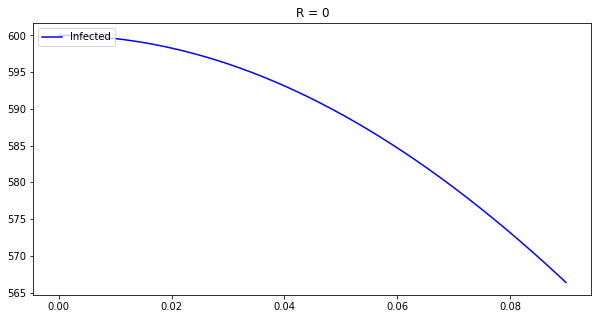


(i) In this case (R) is = 0, and we are in an Endemic situation.
  > The number of infectious people doesn't exponentially grow  and over some time it will eventually come back to zero




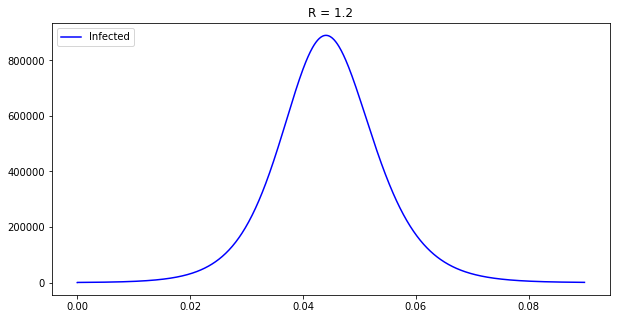


(i) In this last case (R) is > 0 and an Epidemy takes place.
  > This means the virus exponentially grows in its initial stages, before gradually descending.




In [393]:
# more examples: variating reproduction rate value (R)

# description
print('\n# - - - # [ Reproduction Rate Value ] # - - - #',
      '\n\n(?) How is it calculated?',
      '\n\n> f(x): R0 = (a*N)/b'
      '\n\n>>> Examples:\nWhat happens at different Reproduction Rate (R) values?\n',
      '')

# input data from dataframe using pandas
N = data['N'][0]
S = data['S'][0]
I = data['I'][0]

# data initialization
graph_tot_time = 900 # max x displayed value
delta_t = 0.0001


# -- Example 1 - R < 0 # 0.75: 
# additional data initializazion
graph_x = [0] # x axis data: time (array of delta_t(s))
graph_S = [S] # y axis data (0): num of Susceptible people at time graph_x[i]
graph_I = [I] # y axis data (1): "" of Infected people ""
graph_R = [0] # y axis data (2): "" of Removed people ""

# consts variation (so R = 0.75)
# R = ((const_a * N)/const_b)
const_a = 0.000015
const_b = 1200

# graph calcs
for i in range(graph_tot_time):
    graph_S.append(graph_S[i] - (const_a * graph_S[i] * graph_I[i] * delta_t))# f(x): S(k+1) = Sk − (a*Sk*Ik*∆t)   
    # S(k+1) = Sk − (a*Sk*Ik*∆t)
    
    graph_I.append(graph_I[i] + (const_a * graph_S[i] * graph_I[i] * delta_t) - (const_b * graph_I[i] * delta_t))# f(x): I(k+1) = Ik + (a*Sk*Ik*∆t) − (b*Ik*∆t)    
    # I(k+1) = Ik + (a*Sk*Ik*∆t) − (b*Ik*∆t)
    
    graph_R.append(graph_R[i] + (const_b * graph_I[i] * delta_t)) # f(x): R(k+1) = Rk + (b*Ik*∆t)          
    # R(k+1) = Rk + (b*Ik*∆t)
         
    graph_x.append(delta_t * i)
    
# show graph
fig = plt.figure(facecolor='w', figsize=(10,5))
plt.title('R = 0.75')
plt.plot(graph_x, graph_I, label='Infected', c='blue')
plt.legend(loc='upper left')
plt.show()

# description
print('\n(i) In this first case the Reproduction Value (R) is < 0.\n',
      ' > The total number of infectious people quickly comes down to zero, so an epidemic doesn\'t take place.\n\n')


# -- Example 2 - R = 0 # 0: 
# additional data initializazion
graph_x = [0] # x axis data: time (array of delta_t(s))
graph_S = [S] # y axis data (0): num of Susceptible people at time graph_x[i]
graph_I = [I] # y axis data (1): "" of Infected people ""
graph_R = [0] # y axis data (2): "" of Removed people ""

# consts variation (so R = 0)
# R = ((const_a * N)/const_b)
const_a = 0.000020
const_b = 1200 

# graph calcs
for i in range(graph_tot_time):
    graph_S.append(graph_S[i] - (const_a * graph_S[i] * graph_I[i] * delta_t))# f(x): S(k+1) = Sk − (a*Sk*Ik*∆t)   
    # S(k+1) = Sk − (a*Sk*Ik*∆t)
    
    graph_I.append(graph_I[i] + (const_a * graph_S[i] * graph_I[i] * delta_t) - (const_b * graph_I[i] * delta_t))# f(x): I(k+1) = Ik + (a*Sk*Ik*∆t) − (b*Ik*∆t)    
    # I(k+1) = Ik + (a*Sk*Ik*∆t) − (b*Ik*∆t)
    
    graph_R.append(graph_R[i] + (const_b * graph_I[i] * delta_t)) # f(x): R(k+1) = Rk + (b*Ik*∆t)          
    # R(k+1) = Rk + (b*Ik*∆t)
    
    graph_x.append(delta_t * i)
    
# show graph
fig = plt.figure(facecolor='w', figsize=(10,5))
plt.title('R = 0')
plt.plot(graph_x, graph_I, label='Infected', c='blue')
plt.legend(loc='upper left')
plt.show()

# description
print('\n(i) In this case (R) is = 0, and we are in an Endemic situation.\n',
      ' > The number of infectious people doesn\'t exponentially grow ',
      'and over some time it will eventually come back to zero\n\n')


# -- Example 3 - R > 0 # 1.2: 
# additional data initializazion
graph_x = [0] # x axis data: time (array of delta_t(s))
graph_S = [S] # y axis data (0): num of Susceptible people at time graph_x[i]
graph_I = [I] # y axis data (1): "" of Infected people ""
graph_R = [0] # y axis data (2): "" of Removed people ""

# consts variation (so R = 1.2)
# R = ((const_a * N)/const_b)
const_a = 0.000020
const_b = 1000 

# graph calcs
for i in range(graph_tot_time):
    graph_S.append(graph_S[i] - (const_a * graph_S[i] * graph_I[i] * delta_t))# f(x): S(k+1) = Sk − (a*Sk*Ik*∆t)   
    graph_I.append(graph_I[i] + (const_a * graph_S[i] * graph_I[i] * delta_t) - (const_b * graph_I[i] * delta_t))# f(x): I(k+1) = Ik + (a*Sk*Ik*∆t) − (b*Ik*∆t)    
    graph_R.append(graph_R[i] + (const_b * graph_I[i] * delta_t)) # f(x): R(k+1) = Rk + (b*Ik*∆t)          
    
    graph_x.append(delta_t * i)
    
# show graph
fig = plt.figure(facecolor='w', figsize=(10,5))
plt.title('R = 1.2')
plt.plot(graph_x, graph_I, label='Infected', c='blue')
plt.legend(loc='upper left')
plt.show()

# description
print('\n(i) In this last case (R) is > 0 and an Epidemy takes place.\n',
      ' > This means the virus exponentially grows in its initial stages, before gradually descending.\n\n')